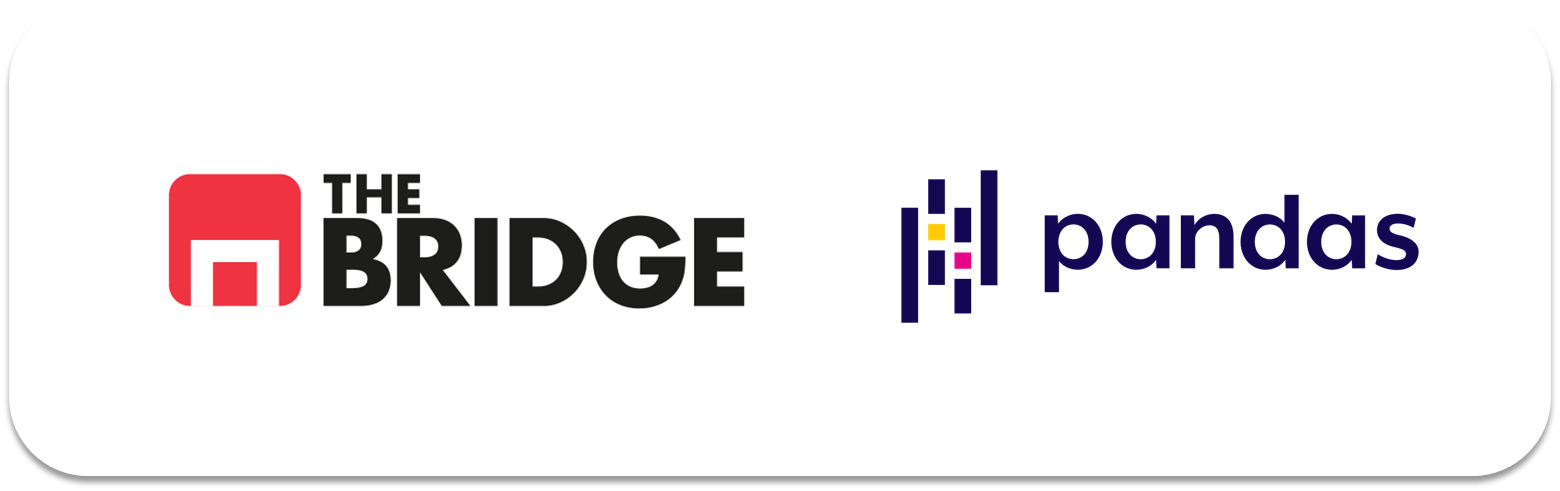

# Pandas

¿Y qué es pandas?

Pandas es una biblioteca esencial en data science que ofrece herramientas en Python para trabajar con datos tabulares de manera eficiente. Permite cargar, limpiar, transformar y analizar datos de manera sencilla. Su estructura de datos principal, el DataFrame, se asemeja a una tabla de hoja de cálculo y facilita la exploración y manipulación de datos, siendo una herramienta fundamental para cualquier analista o científico de datos.

In [8]:
import numpy as np
import pandas as pd

Y ahora un adelanto, vamos a leer un fichero excel que tiene este aspecto:

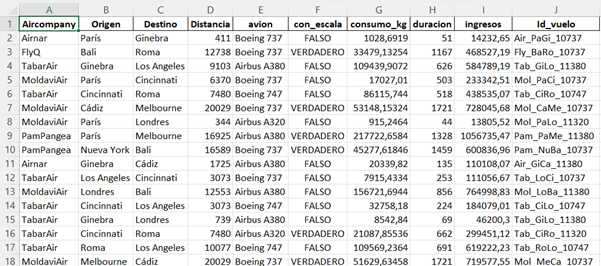

In [10]:
df_ejemplo = pd.read_excel("./data/dataset_aviones.xlsx")
df_ejemplo.head(15)

,Aircompany,Origen,Destino,Distancia,avion,con_escala,consumo_kg,duracion,ingresos,Id_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380
8,PamPangea,Nueva York,Bali,16589,Boeing 737,True,45277.618464,1459,600836.96,Pam_NuBa_10737
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380



En las primeras sesiones de la unidad vamos a ver las dos clases, u objetos [o tipos] más importantes de Pandas: Series y DataFrame, y además veremos brevemente el tipo o clase Index. [¿Y por qué este orden...?]

## Objetos Pandas: Series

En un nivel muy básico, los objetos Pandas pueden ser considerados como **versiones mejoradas de los arrays estructurados de NumPy en los que las filas y columnas se identifican con etiquetas en lugar de simples índices enteros.**

Como veremos en el transcurso de este capítulo, Pandas proporciona una gran cantidad de herramientas útiles, métodos y funcionalidad sobre las estructuras de datos básicas, pero **casi todo lo que sigue requerirá una comprensión de lo que son estas estructuras**

## Introducción  
 


Una ``Serie`` de Pandas es un array unidimensional de datos indexados.
Se puede crear a partir de una lista o un array de la siguiente manera:

In [11]:
# Heights of class
# Create series 5 values
data = pd.Series([1.60, 1.59, 1.87, 2.05, 1.75],
                 index = ["Estudiante 1", "Estudiante 2",
                          "Estudiante 3", "Estudiante 4",
                          "Estudiante 5"])
data

Estudiante 1    1.60
Estudiante 2    1.59
Estudiante 3    1.87
Estudiante 4    2.05
Estudiante 5    1.75
dtype: float64

Como vemos en la salida, la ``Serie`` envuelve tanto una secuencia de valores como una secuencia de índices, a los que podemos acceder con los atributos ``values`` e ``index``.
Los ``valores`` son simplemente una matriz NumPy:

In [12]:
data.values

array([1.6 , 1.59, 1.87, 2.05, 1.75])

El ``índice`` es un objeto tipo array del tipo ``pd.Index``, del que hablaremos con más detalle.

In [13]:
data.index

Index(['Estudiante 1', 'Estudiante 2', 'Estudiante 3', 'Estudiante 4',
       'Estudiante 5'],
      dtype='object')

Al igual que con un array de NumPy, se puede acceder a los datos por el índice asociado mediante la notación de corchetes de Python:

In [14]:
data[1]

C:\Users\edici\AppData\Local\Temp\ipykernel_55256\3862107824.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[1]


1.59

In [17]:
data.iloc[-1]

1.75

In [20]:
otra_serie = data[1:4].copy()
otra_serie[2] = 3.05
otra_serie

C:\Users\edici\AppData\Local\Temp\ipykernel_55256\3501142499.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  otra_serie[2] = 3.05


Estudiante 2    1.59
Estudiante 3    1.87
Estudiante 4    3.05
dtype: float64

In [21]:
data[1:4:2]

Estudiante 2    1.59
Estudiante 4    2.05
dtype: float64

Sin embargo, como veremos, **la ``Serie`` de Pandas es mucho más general y flexible que el array unidimensional de NumPy** que emula.

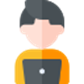
<table align="left">
     <td style="text-align:left">
         <h3>Ejercicio pandas Series</h3>

      
<ol>
    <li>Crea un programa que te pida 5 nombres de ciudad por pantalla</li>
    <li>Guarda esas ciudades en una lista</li>
    <li>Crea un pandas Series a partir de la lista</li>
    <li>Ponle el nombre "Ciudades"</li>
</ol>
         
 </td></tr>
</table>

In [22]:
ls_ciudades = []
for i in range(5):
    name = input(f"Introduzca nombre de ciudad ({(i + 1)}/5)")
    ls_ciudades.append(name)
sr_ciudades = pd.Series(ls_ciudades)
sr_ciudades.name = "Mis_Ciudades"

Introduzca nombre de ciudad (1/5) Algeciras
Introduzca nombre de ciudad (2/5) Ceuta
Introduzca nombre de ciudad (3/5) Ferrol
Introduzca nombre de ciudad (4/5) Cadiz
Introduzca nombre de ciudad (5/5) Madrid


In [23]:
sr_ciudades

0    Algeciras
1        Ceuta
2       Ferrol
3        Cadiz
4       Madrid
Name: Mis_Ciudades, dtype: object